# Libraries

In [1]:
import audiofile as af
import matplotlib.pyplot as plt
import numpy as np
from distfx import distfx

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


# General Parameters

In [2]:
inputFile = 'audios\LW.wav'
distWall = 40                           # distance listener-wall (meters)
distsSource = [1,5,10,15,20,25,30,35]   # distances listener-source (meters), for multiple runs
distSource = 0.1 * distWall              # distances listener-source (meters), for single runs
impulseReverbLen = 0.05                 # impulse response lenght for reverberation
soundSpeed = 340                        # sound speed in m/s


x, fs = af.read(inputFile)
nome = inputFile.split('.wav')[0]

# Single run

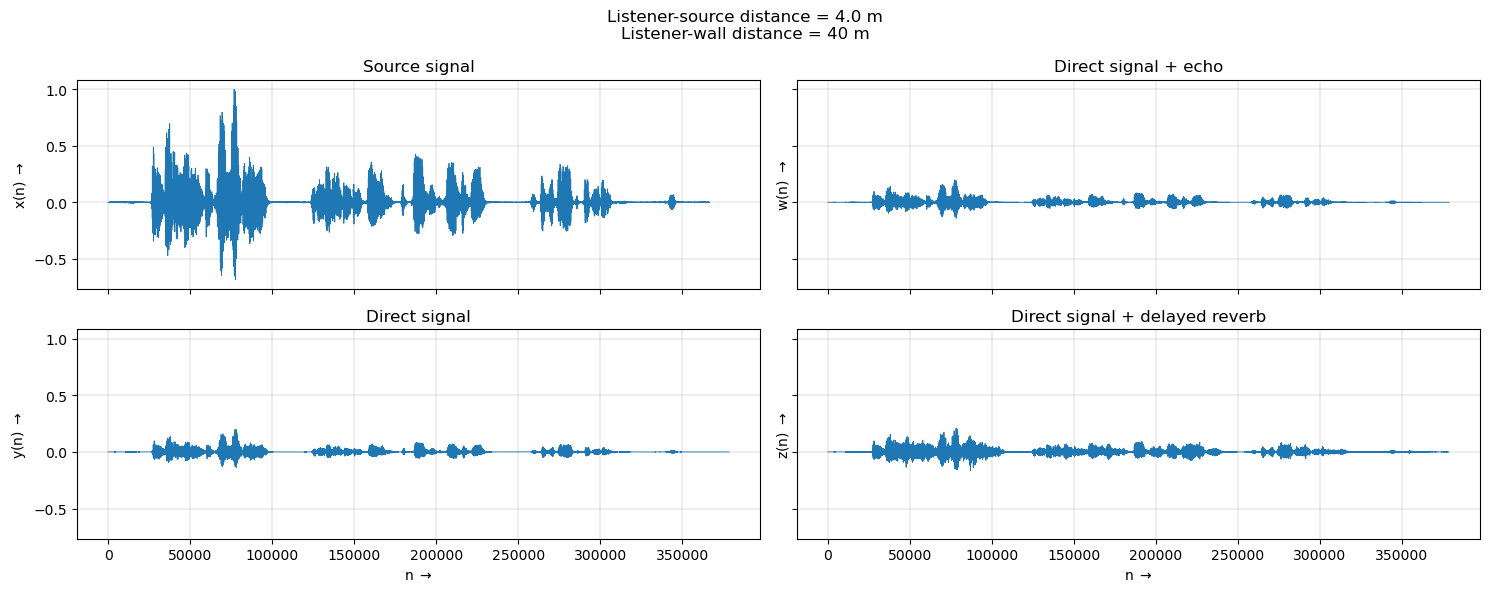

In [3]:
y,w,z = distfx(x,fs,distSource,distWall,soundSpeed,impulseReverbLen)

af.write(nome+'_y.wav',y,fs,16)
af.write(nome+'_w.wav',w,fs,16)
af.write(nome+'_z.wav',z,fs,16)

plt.subplots(nrows=2, ncols=2, sharex=True, sharey =True, figsize=(15,6))
fig = plt.gcf()
fig.suptitle('Listener-source distance = ' + str(distSource) + ' m\nListener-wall distance = ' + str(distWall)+' m')
plt.subplot(2,2,1)
plt.plot(x.T, lw=0.6)
plt.title('Source signal')
plt.ylabel(r'x(n) $\rightarrow$')
ax = plt.gca()
plt.grid(lw=0.3)

plt.subplot(2,2,3)
plt.plot(y.T, lw=0.6)
plt.title('Direct signal')
plt.xlabel(r'n $\rightarrow$')
plt.ylabel(r'y(n) $\rightarrow$')
plt.grid(lw=0.3)

plt.subplot(2,2,2)
plt.plot(w.T, lw=0.6)
plt.title('Direct signal + echo')
plt.ylabel(r'w(n) $\rightarrow$')
plt.grid(lw=0.3)

plt.subplot(2,2,4)
plt.plot(z.T, lw=0.6)
plt.title('Direct signal + delayed reverb')
plt.xlabel(r'n $\rightarrow$')
plt.ylabel(r'z(n) $\rightarrow$')
plt.grid(lw=0.3)

plt.tight_layout()
plt.show()

# Multiple runs (multiple distances listener-source

In [4]:
auxZero = np.zeros(fs)
auxZero2 = auxZero.copy()
if x.ndim >1:
    for i in range(min(x.shape)-1):
        auxZero = np.vstack((auxZero,auxZero2))
    
for d in distsSource:
    y,w,z = distfx(x,fs,d,distWall,340,impulseReverbLen)
    if d ==distsSource[0]:
        if x.ndim >1:
            y_out = np.concatenate((y,auxZero),axis = 1)
            w_out = np.concatenate((w,auxZero),axis = 1)
            z_out = np.concatenate((z,auxZero),axis = 1)
        else:
            y_out = np.concatenate((y,auxZero))
            w_out = np.concatenate((w,auxZero))
            z_out = np.concatenate((z,auxZero))
    else:
        if x.ndim >1:
            y_out = np.concatenate((y_out,y,auxZero),axis = 1)
            w_out = np.concatenate((w_out,w,auxZero),axis = 1)
            z_out = np.concatenate((z_out,z,auxZero),axis = 1)
        else:
            y_out = np.concatenate((y_out,y,auxZero))
            w_out = np.concatenate((w_out,w,auxZero))
            z_out = np.concatenate((z_out,z,auxZero))    

af.write(nome+'_ys.wav',y_out,fs,16)
af.write(nome+'_ws.wav',w_out,fs,16)
af.write(nome+'_zs.wav',z_out,fs,16)